**DESCRIPTION**

**Problem Statement**

This is the flight delay prediction for the month of January. 

This data is collected from the Bureau of Transportation Statistics, Govt. of the USA. This data is open-sourced under U.S. Govt. Works. This dataset contains all the flights in the month of January 2019 and January 2020. There are more than 400,000 flights in the month of January itself throughout the United States. 

This data could well be used to predict the flight delay at the destination airport specifically for the month of January in upcoming years as the data is for January only.

This file contains all the flights starting from 1st January 2019 till 31st January 2019. There are around 400,000 rows in this file and 21 feature columns indicating the features of the flight including information about origin airport, destination airport, airplane information, departure time and arrival time.

Downlod the **data sets** from _**[here](https://www.kaggle.com/divyansh22/flight-delay-prediction)**_.


Following Approaches were used
    1. Data Wrangling and  Data Visualization to remove the redundant features
    3. Feature engineering(Correlation and Chisquare Test for Categorical Features)
    4. Stratified K-Fold Cross Validation
    5. Oversampling Technique
    6. Model Training using Logistic Regression, Decesion Tree, RandomForest, XGBoost Classifiers, Neural Nets

SUMMARY and CONCLUSION:
    1. 10 Fold Cross validation results suggested that there is not much of performance difference between 
       traditional models like Logistic Regression, Decesion Tree , Random Forest and XG Boost. In fact Logistic
       Regression performance was better than others
    2. There is not much of performance difference between Imbalance and Balance dataset.  
    

In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score,classification_report,confusion_matrix
        

from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/kaggle/input/flight-delay-prediction/Jan_2019_ontime.csv
/kaggle/input/flight-delay-prediction/Jan_2020_ontime.csv


In [2]:
traindata0119=pd.read_csv('/kaggle/input/flight-delay-prediction/Jan_2019_ontime.csv')
traindata0120=pd.read_csv('/kaggle/input/flight-delay-prediction/Jan_2020_ontime.csv')

In [64]:
traindata0119.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [65]:
traindata0120.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [66]:
#Merge both the dataset
traindata0=pd.concat([traindata0119,traindata0120])
#traindata0=traindata0.iloc[:,np.arange(21)]

In [67]:
traindata0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191331 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1191331 non-null  int64  
 1   DAY_OF_WEEK            1191331 non-null  int64  
 2   OP_UNIQUE_CARRIER      1191331 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  1191331 non-null  int64  
 4   OP_CARRIER             1191331 non-null  object 
 5   TAIL_NUM               1188090 non-null  object 
 6   OP_CARRIER_FL_NUM      1191331 non-null  int64  
 7   ORIGIN_AIRPORT_ID      1191331 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  1191331 non-null  int64  
 9   ORIGIN                 1191331 non-null  object 
 10  DEST_AIRPORT_ID        1191331 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    1191331 non-null  int64  
 12  DEST                   1191331 non-null  object 
 13  DEP_TIME               1168315 non-null  float64
 14  DEP_DEL15          

In [68]:
#let us figure out the redundant attributes
traindata0.OP_UNIQUE_CARRIER.value_counts()

WN    221082
DL    153903
AA    153293
OO    136086
UA     95316
YX     54878
MQ     51899
B6     49152
OH     47478
9E     43266
AS     41854
YV     36182
NK     32699
EV     23759
F9     22114
G4     14537
HA     13833
Name: OP_UNIQUE_CARRIER, dtype: int64

In [69]:
traindata0.OP_CARRIER_AIRLINE_ID.value_counts()

19393    221082
19790    153903
19805    153293
20304    136086
19977     95316
20452     54878
20398     51899
20409     49152
20397     47478
20363     43266
19930     41854
20378     36182
20416     32699
20366     23759
20436     22114
20368     14537
19690     13833
Name: OP_CARRIER_AIRLINE_ID, dtype: int64

In [70]:
traindata0.OP_CARRIER.value_counts()

WN    221082
DL    153903
AA    153293
OO    136086
UA     95316
YX     54878
MQ     51899
B6     49152
OH     47478
9E     43266
AS     41854
YV     36182
NK     32699
EV     23759
F9     22114
G4     14537
HA     13833
Name: OP_CARRIER, dtype: int64

In [71]:
#From above resuls we can conclude that OP_UNIQUE_CARRIER , OP_CARRIER_AIRLINE_ID, OP_CARRIER are redundant features.
# Hence we can remove OP_UNIQUE_CARRIER, OP_CARRIER and retain only the numerical feature OP_CARRIER_AIRLINE_ID
# similarly ORIGIN_AIRPORT_ID, ORIGIN_AIRPORT_SEQ_ID and ORIGIN are redundant features and hence we can retain ONLY ORIGIN_AIRPORT_ID 
# similarly DEST_AIRPORT_ID, DEST_AIRPORT_SEQ_ID and DEST are redundant features and hence we can retain ONLY DEST_AIRPORT_ID
# Also we dont want CANCELLED and DIVERTED CASES
#ARR_TIME and ARR_DEL15 can be considered as target variables, We can drop ARR_TIME since we have consedered ARR_DEL15 as target  

traindata1=traindata0.drop(columns=['OP_UNIQUE_CARRIER','OP_CARRIER','ORIGIN_AIRPORT_SEQ_ID',
                                    'ORIGIN','DEST_AIRPORT_SEQ_ID','DEST',
                                   'CANCELLED','DIVERTED','ARR_TIME','Unnamed: 21','TAIL_NUM'])

In [72]:
traindata1.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,DISTANCE
0,1,2,20363,3280,11953,10397,601.0,0.0,0600-0659,0.0,300.0
1,1,2,20363,3281,13487,11193,1359.0,0.0,1400-1459,0.0,596.0
2,1,2,20363,3282,11433,11193,1215.0,0.0,1200-1259,0.0,229.0
3,1,2,20363,3283,15249,10397,1521.0,0.0,1500-1559,0.0,223.0
4,1,2,20363,3284,10397,11778,1847.0,0.0,1900-1959,0.0,579.0


In [73]:
traindata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191331 entries, 0 to 607345
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1191331 non-null  int64  
 1   DAY_OF_WEEK            1191331 non-null  int64  
 2   OP_CARRIER_AIRLINE_ID  1191331 non-null  int64  
 3   OP_CARRIER_FL_NUM      1191331 non-null  int64  
 4   ORIGIN_AIRPORT_ID      1191331 non-null  int64  
 5   DEST_AIRPORT_ID        1191331 non-null  int64  
 6   DEP_TIME               1168315 non-null  float64
 7   DEP_DEL15              1168277 non-null  float64
 8   DEP_TIME_BLK           1191331 non-null  object 
 9   ARR_DEL15              1165231 non-null  float64
 10  DISTANCE               1191331 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 109.1+ MB


In [74]:
# get the percentage of null values across each attributes
traindata1.isnull().sum()/len(traindata1)*100   

DAY_OF_MONTH             0.000000
DAY_OF_WEEK              0.000000
OP_CARRIER_AIRLINE_ID    0.000000
OP_CARRIER_FL_NUM        0.000000
ORIGIN_AIRPORT_ID        0.000000
DEST_AIRPORT_ID          0.000000
DEP_TIME                 1.931957
DEP_DEL15                1.935146
DEP_TIME_BLK             0.000000
ARR_DEL15                2.190827
DISTANCE                 0.000000
dtype: float64

In [75]:
#As the the null value percentage are very less we can drop the null records instead of NULL value imputation
traindata1.dropna(inplace=True)
traindata1.reset_index(drop=True,inplace=True)
traindata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165231 entries, 0 to 1165230
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1165231 non-null  int64  
 1   DAY_OF_WEEK            1165231 non-null  int64  
 2   OP_CARRIER_AIRLINE_ID  1165231 non-null  int64  
 3   OP_CARRIER_FL_NUM      1165231 non-null  int64  
 4   ORIGIN_AIRPORT_ID      1165231 non-null  int64  
 5   DEST_AIRPORT_ID        1165231 non-null  int64  
 6   DEP_TIME               1165231 non-null  float64
 7   DEP_DEL15              1165231 non-null  float64
 8   DEP_TIME_BLK           1165231 non-null  object 
 9   ARR_DEL15              1165231 non-null  float64
 10  DISTANCE               1165231 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 97.8+ MB


In [76]:
#Lets analyze the Catagorical variables DEP_TIME_BLK
traindata1.DEP_TIME_BLK.value_counts()


0600-0659    84358
0700-0759    77553
0800-0859    76889
1700-1759    75290
1200-1259    73476
1100-1159    73471
1500-1559    70574
1000-1059    70303
1400-1459    70070
0900-0959    69828
1600-1659    69825
1800-1859    67906
1300-1359    66655
1900-1959    63318
2000-2059    54034
2100-2159    35827
0001-0559    31413
2200-2259    26653
2300-2359     7788
Name: DEP_TIME_BLK, dtype: int64

In [77]:
#We can do a quick check if these two categorical variables have any influence on the target variable.
#This can be tested using Chisquare Test of independence: H0: There is no dependency between Feature and Target Ha:There is dependency
from scipy.stats import chi2_contingency
categorical_columns=['DEP_TIME_BLK']
chi2_check = []
for i in categorical_columns:
    ch2 , p_value , df, exp_freq=chi2_contingency(pd.crosstab(traindata1[i],traindata1['ARR_DEL15']))
    if p_value < 0.05:
        chi2_check.append('Reject Null Hypothesis: Retain the Feature:'+i)
    else:
        chi2_check.append('Fail to Reject Null Hypothesis: Drop the Feature:')
chi2_check

['Reject Null Hypothesis: Retain the Feature:DEP_TIME_BLK']

In [78]:
#From Chisquare test it seems that we need to retain the the above categorical featuture
# DEP_TIME_BLK can be filled with numeric value
traindata1.DEP_TIME_BLK.replace(['0600-0659','0700-0759','0800-0859','1700-1759','1200-1259','1100-1159','1500-1559',
                                 '1000-1059','1400-1459','0900-0959','1600-1659','1800-1859','1300-1359','1900-1959',
                                 '2000-2059','2100-2159','0001-0559','2200-2259','2300-2359'],
                               [6,7,8,17,12,11,15,10,14,9,16,18,13,19,20,21,1,22,23],inplace=True)


In [79]:
traindata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165231 entries, 0 to 1165230
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   DAY_OF_MONTH           1165231 non-null  int64  
 1   DAY_OF_WEEK            1165231 non-null  int64  
 2   OP_CARRIER_AIRLINE_ID  1165231 non-null  int64  
 3   OP_CARRIER_FL_NUM      1165231 non-null  int64  
 4   ORIGIN_AIRPORT_ID      1165231 non-null  int64  
 5   DEST_AIRPORT_ID        1165231 non-null  int64  
 6   DEP_TIME               1165231 non-null  float64
 7   DEP_DEL15              1165231 non-null  float64
 8   DEP_TIME_BLK           1165231 non-null  int64  
 9   ARR_DEL15              1165231 non-null  float64
 10  DISTANCE               1165231 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 97.8 MB


In [80]:
#Lets check the correlation among the variables
traindata1.corr()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_DEL15,DISTANCE
DAY_OF_MONTH,1.000000,-0.037028,-0.000575,-0.015971,-0.006075,-0.005719,-0.003336,-0.013409,-0.003658,-0.005327,-0.018417
DAY_OF_WEEK,-0.037028,1.000000,0.005989,0.058514,0.005676,0.005284,0.005010,0.022633,0.005725,0.024707,0.018457
OP_CARRIER_AIRLINE_ID,-0.000575,0.005989,1.000000,0.434421,-0.048454,-0.048654,0.003097,0.035540,0.000321,0.070229,-0.125575
OP_CARRIER_FL_NUM,-0.015971,0.058514,0.434421,1.000000,-0.055609,-0.060729,0.006399,0.023933,-0.001836,0.033355,-0.347112
ORIGIN_AIRPORT_ID,-0.006075,0.005676,-0.048454,-0.055609,1.000000,0.016882,-0.032587,0.002874,-0.030905,0.007959,0.090792
DEST_AIRPORT_ID,-0.005719,0.005284,-0.048654,-0.060729,0.016882,1.000000,0.031988,0.009602,0.035485,0.010728,0.090469
DEP_TIME,-0.003336,0.005010,0.003097,0.006399,-0.032587,0.031988,1.000000,0.172670,0.962739,0.129090,-0.021333
DEP_DEL15,-0.013409,0.022633,0.035540,0.023933,0.002874,0.009602,0.172670,1.000000,0.117195,0.716551,0.012421
DEP_TIME_BLK,-0.003658,0.005725,0.000321,-0.001836,-0.030905,0.035485,0.962739,0.117195,1.000000,0.079467,-0.010722
ARR_DEL15,-0.005327,0.024707,0.070229,0.033355,0.007959,0.010728,0.129090,0.716551,0.079467,1.000000,0.006920


In [81]:
#From above correlation matrix its evident that there are some muticoliniarity variables
#Example:
# 1. There is a very strong correlation between DEP_TIME_BLK and DEP_TIME (96%)
# 2. There is also noticiable corrlelation between OP_CARRIER_AIRLINE_ID and OP_CARRIER_FL_NUM
# Hence we can try dropping DEP_TIME_BLK and OP_CARRIER_AIRLINE_ID

traindata2=traindata1.drop(columns=['DEP_TIME_BLK','OP_CARRIER_AIRLINE_ID'])

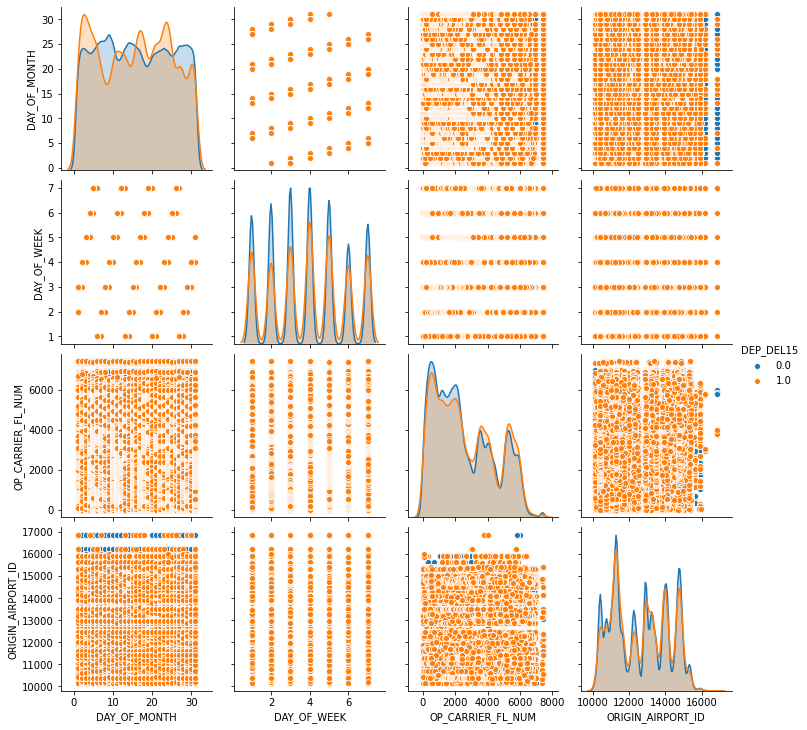

In [82]:
features=['DAY_OF_MONTH','DAY_OF_WEEK','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID']

#Lets do pair plot and visualize the class separability


#plt.subplot(2,4,1)
sns.pairplot(traindata2,x_vars=features,y_vars=features,kind='scatter',hue='DEP_DEL15')
plt.show()

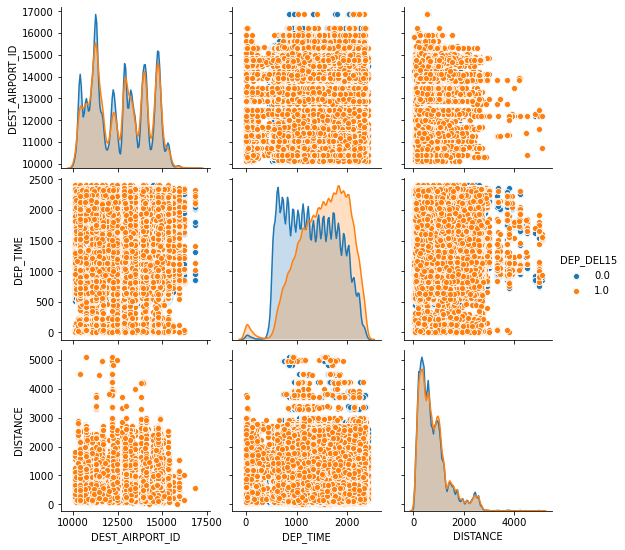

In [83]:
features=['DEST_AIRPORT_ID','DEP_TIME','DISTANCE']

#Lets do pair plot and visualize the class separability
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#plt.subplot(2,4,1)
sns.pairplot(traindata2,x_vars=features,y_vars=features,kind='scatter',hue='DEP_DEL15')
plt.show()

In [25]:
# From above pair plots it seems that Target variables are not linearly saparable with most ofthe features except Dep_time
# Extract the features and label
traindata2.head(1)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DEL15,ARR_DEL15,DISTANCE
0,1,2,3280,11953,10397,601.0,0.0,0.0,300.0


In [17]:
features=traindata2.drop(columns=['ARR_DEL15']).values
label=traindata2['ARR_DEL15'].values

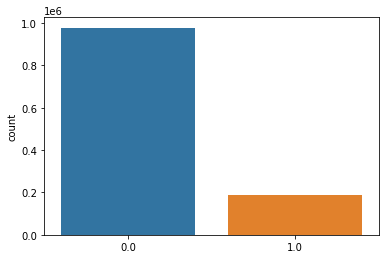

In [28]:
#Check for data balance
sns.countplot(x=label)

In [54]:
#Split the data into Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test_final,y_train,y_test_final=train_test_split(features,label,test_size=0.2,random_state=12)
print('the shape of X_train and  y_train: ', X_train.shape, y_train.shape)
print('the shape of X_test and  y_test: ', X_test_final.shape,y_test_final.shape)


## Verify the performance of different models using Stratified-KFold Cross Validation


the shape of X_train and  y_train:  (932184, 8) (932184,)
the shape of X_test and  y_test:  (233047, 8) (233047,)


In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score,classification_report,confusion_matrix
#from sklearn import metrics

def stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y):
    global df_model_selection
    
    skf = StratifiedKFold(n_splits, random_state=12,shuffle=True)
    
    weighted_f1_score = []
    #print(skf.split(X,y))
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[test_index] 
        y_train, y_test = y[train_index], y[test_index]
        
        
        model_obj.fit(X_train, y_train)##### HERE ###
        test_ds_predicted = model_obj.predict( X_test ) ##### HERE ####   
        #print( metrics.classification_report( y_test, test_ds_predicted ) )    
        weighted_f1_score.append(round(f1_score(y_true=y_test, y_pred=test_ds_predicted , average='weighted'),2))
        
    sd_weighted_f1_score = np.std(weighted_f1_score, ddof=1)
    range_of_f1_scores = "{}-{}".format(min(weighted_f1_score),max(weighted_f1_score))    
    df_model_selection = pd.concat([df_model_selection,pd.DataFrame([[process,model_name,sorted(weighted_f1_score),range_of_f1_scores,sd_weighted_f1_score]], columns =COLUMN_NAMES) ])
    

In [55]:
%%time

COLUMN_NAMES = ["Process","Model Name", "F1 Scores","Range of F1 Scores","Std Deviation of F1 Scores"]
df_model_selection = pd.DataFrame(columns=COLUMN_NAMES)

process='Stratified-KFold'
n_splits = 10
X=sc.fit_transform(X_train)
y=y_train

# Logistic Regression
model_LR=LogisticRegression()
model_obj=model_LR
model_name='Logistic Regression'
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)

# Decesion Tree Classifier
model_DTC=DecisionTreeClassifier()
model_obj=model_DTC
model_name='Decesion Tree Classifier'
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)

# Random Forest Classifier
model_RFC=RandomForestClassifier()
model_obj=model_RFC
model_name='Random Forest Classifier'
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)

# XGBoost Classifier
model_XGBC=XGBClassifier()
model_obj=model_XGBC
model_name='XGBoost Classifier'
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)

# Gradient Boosting Classifier
model_GBC=GradientBoostingClassifier()
model_obj=model_GBC
model_name='Gradient Boosting Classifier'
stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)

# XGBoost Random Forest Classifier
#model_XGBRFC=XGBRFClassifier()
#model_obj=model_XGBRFC
#model_name='XGBoost Random Forest Classifier'
#stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)

# 8.Support Vector Machine Classifier
#model_SVC=SVC()
#model_obj=model_SVC
#model_name='Support Vector Machine Classifier'
#stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)


# 9.SGD Classifier
#model_sgd = OneVsRestClassifier(SGDClassifier())
#model_obj=model_sgd
#model_name='Stochastic Gradient Descent Classifier'
#stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)


#11.KNeighborsClassifier
#model_KNNC=KNeighborsClassifier()
#model_obj=model_KNNC
#model_name='K Nearst Neighbour Classifier'
#stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)

#12 Linear Discriminant Analysis
#model_LDA=LinearDiscriminantAnalysis()
#model_obj=model_LDA
#model_name='Linear Discriminant Analysis'
#stratified_K_fold_validation(model_obj, model_name, process, n_splits, X, y)

#Exporting the results to csv
#df_model_selection.to_csv("Model_statistics.csv",index = False)
df_model_selection

CPU times: user 9.34 s, sys: 130 ms, total: 9.47 s
Wall time: 9.49 s


,Process,Model Name,F1 Scores,Range of F1 Scores,Std Deviation of F1 Scores
0,Stratified-KFold,Logistic Regression,"[0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.9...",0.92-0.93,0.003162


In [ ]:

Process	Model Name	F1 Scores	Range of F1 Scores	Std Deviation of F1 Scores
0	Stratified-KFold	Logistic Regression	[0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.9...	0.92-0.93	3.162278e-03
0	Stratified-KFold	Decesion Tree Classifier	[0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.8...	0.88-0.88	1.170278e-16
0	Stratified-KFold	Random Forest Classifier	[0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.9...	0.92-0.93	3.162278e-03
0	Stratified-KFold	XGBoost Classifier	[0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.9...	0.92-0.93	3.162278e-03

In [56]:
#Lets get the best samples out of 10 splits

# Now lets try to get the Scores using StratifiedKFold Cross Validation

#Initialize the algo
model=LogisticRegression()

#Initialize StratifiedKFold Method
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, 
              random_state=1,
              shuffle=True)

#Initialize For Loop 

i=0
for train,test in kfold.split(X,y):
    i = i+1
    X_train,X_test = X[train],X[test]
    y_train,y_test = y[train],y[test]
    
    model.fit(X_train,y_train)
    test_ds_predicted=model.predict(X_test)
    train_ds_predicted=model.predict(X_train)
    
    test_f1_score=round(f1_score(y_true=y_test, y_pred=test_ds_predicted , average='weighted'),2)
    train_f1_score=round(f1_score(y_true=y_train, y_pred=train_ds_predicted , average='weighted'),2)
    
    #print("Train Score: {}, Test score: {}, for Sample Split: {}".format(model.score(X_train,y_train),model.score(X_test,y_test),i))
    print("Train f1-Score: {}, Test f1-score: {}, for Sample Split: {}".format(train_f1_score,test_f1_score,i))

Train f1-Score: 0.92, Test f1-score: 0.92, for Sample Split: 1
Train f1-Score: 0.92, Test f1-score: 0.92, for Sample Split: 2
Train f1-Score: 0.92, Test f1-score: 0.92, for Sample Split: 3
Train f1-Score: 0.92, Test f1-score: 0.92, for Sample Split: 4
Train f1-Score: 0.92, Test f1-score: 0.92, for Sample Split: 5
Train f1-Score: 0.92, Test f1-score: 0.92, for Sample Split: 6
Train f1-Score: 0.92, Test f1-score: 0.92, for Sample Split: 7
Train f1-Score: 0.92, Test f1-score: 0.92, for Sample Split: 8
Train f1-Score: 0.92, Test f1-score: 0.93, for Sample Split: 9
Train f1-Score: 0.92, Test f1-score: 0.92, for Sample Split: 10


In [57]:
#Lets extract the Train and Test sample for split 9
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, #n_splits should be equal to no of cv value in cross_val_score
              random_state=1,
              shuffle=True)
i=0
for train,test in kfold.split(X,y):
    i = i+1
    if i == 9:
        X_train,X_test,y_train,y_test = X[train],X[test],y[train],y[test]

#Final Model
finalModel=LogisticRegression()
finalModel.fit(X_train,y_train)

test_ds_predicted=model.predict(X_test)
train_ds_predicted=model.predict(X_train)

test_f1_score=round(f1_score(y_true=y_test, y_pred=test_ds_predicted , average='weighted'),2)
train_f1_score=round(f1_score(y_true=y_train, y_pred=train_ds_predicted , average='weighted'),2)
print("Train f1-Score: {}, Test f1-score: {}".format(train_f1_score,test_f1_score))


train_score=np.round(finalModel.score(X_train,y_train),2)
test_score=np.round(finalModel.score(X_test,y_test),2)
print('Train Accuracy Score is:{} and  Test Accuracy Score:{}'.format(train_score,test_score))

#Classification Report
cr=classification_report(y_true=y_test,y_pred=finalModel.predict(X_test))
print(cr)

Train f1-Score: 0.92, Test f1-score: 0.93
Train Accuracy Score is:0.92 and  Test Accuracy Score:0.93
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     78223
         1.0       0.78      0.75      0.77     14995

    accuracy                           0.93     93218
   macro avg       0.87      0.86      0.86     93218
weighted avg       0.93      0.93      0.93     93218



In [58]:
#Lets test the model in unknown dataset: X_test_final and y_test_final
X_test_final=sc.fit_transform(X_test_final)
cr=classification_report(y_true=y_test_final,y_pred=finalModel.predict(X_test_final))
print(cr)

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96    195490
         1.0       0.78      0.74      0.76     37557

    accuracy                           0.92    233047
   macro avg       0.86      0.85      0.86    233047
weighted avg       0.92      0.92      0.92    233047



In [21]:
## Lets try out Neural Network
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Dense

the shape of X_train and  y_train:  (932184, 8) (932184,)
the shape of X_test and  y_test:  (233047, 8) (233047,)


In [22]:
%%time
#Build a sequential model
tf.keras.backend.clear_session()

#Initialize Sequential model
model_NN = tf.keras.models.Sequential()
#Input Layer
model_NN.add(tf.keras.layers.Reshape((8,),input_shape=(8,)))
#Normalize the data
model_NN.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model_NN.add(tf.keras.layers.Dense(100, activation='relu'))
#Dropout layer
#model_NN.add(tf.keras.layers.Dropout(0.5))
#Normalize the data
model_NN.add(tf.keras.layers.BatchNormalization())

#Add 2nd hidden layer
model_NN.add(tf.keras.layers.Dense(50, activation='relu'))
#Dropout layer
#model_NN.add(tf.keras.layers.Dropout(0.3))
#Normalize the data
model_NN.add(tf.keras.layers.BatchNormalization())

#Add OUTPUT layer
model_NN.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Create optimizer with non-default learning rate
#sgd_optimizer = tf.keras.optimizers.SGD(lr=1.0)
#model_NN.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Compile the model
model_NN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#model_NN.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

CPU times: user 753 ms, sys: 678 ms, total: 1.43 s
Wall time: 2.92 s


In [23]:
%%time
model_NN.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=10,
          batch_size=32)

Epoch 1/10
29131/29131 [==============================] - 113s 4ms/step - loss: 0.2486 - accuracy: 0.9243 - val_loss: 0.2442 - val_accuracy: 0.9246
Epoch 2/10
29131/29131 [==============================] - 113s 4ms/step - loss: 0.2455 - accuracy: 0.9247 - val_loss: 0.2428 - val_accuracy: 0.9246
Epoch 3/10
29131/29131 [==============================] - 114s 4ms/step - loss: 0.2450 - accuracy: 0.9247 - val_loss: 0.2431 - val_accuracy: 0.9246
Epoch 4/10
29131/29131 [==============================] - 113s 4ms/step - loss: 0.2446 - accuracy: 0.9247 - val_loss: 0.2428 - val_accuracy: 0.9246
Epoch 5/10
29131/29131 [==============================] - 113s 4ms/step - loss: 0.2445 - accuracy: 0.9247 - val_loss: 0.2417 - val_accuracy: 0.9246
Epoch 6/10
29131/29131 [==============================] - 114s 4ms/step - loss: 0.2441 - accuracy: 0.9247 - val_loss: 0.2428 - val_accuracy: 0.9246
Epoch 7/10
29131/29131 [==============================] - 113s 4ms/step - loss: 0.2441 - accuracy: 0.9247 - val_

In [ ]:
##Observation from Neural Net: There is not much of improvement in accuracy as compared to logistic regression

the shape of X_train and  y_train:  (932184, 8) (932184,)
the shape of X_test and  y_test:  (233047, 8) (233047,)
length of X_train and y_train before Oversampling 932184 932184
length of X_train and y_train after Oversampling 1564468 1564468


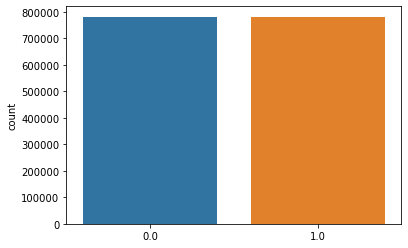

In [59]:
# As the Data is imbalance , we can try using Oversampling technique() and see if we can improve the model performance
# Databalancing technique can be applied onöy on Train dataset

#Split the data into Train, Valdation and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test_final,y_train,y_test_final=train_test_split(features,label,test_size=0.2,random_state=12)
print('the shape of X_train and  y_train: ', X_train.shape, y_train.shape)
print('the shape of X_test and  y_test: ', X_test_final.shape,y_test_final.shape)


from imblearn.over_sampling import SMOTE
print('length of X_train and y_train before Oversampling',len(X_train),len(y_train))

OS=SMOTE(random_state=42)
X_train_OS,y_train_OS=OS.fit_resample(X_train,y_train)

print('length of X_train and y_train after Oversampling',len(X_train_OS),len(y_train_OS))

#Check for data balance
sns.countplot(x=y_train_OS)


In [60]:
%%time
# We can now apply cross validation 
#Initialize the algo
model=LogisticRegression()

X_train_OS=sc.fit_transform(X_train_OS) # scale the data

#Initialize StratifiedKFold Method
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, 
              random_state=1,
              shuffle=True)

#Initialize For Loop 

i=0
for train,test in kfold.split(X_train_OS,y_train_OS):
    i = i+1
    X_train,X_test = X_train_OS[train],X_train_OS[test]
    y_train,y_test = y_train_OS[train],y_train_OS[test]
    
    model.fit(X_train,y_train)
    test_ds_predicted=model.predict(X_test)
    train_ds_predicted=model.predict(X_train)
    
    test_f1_score=round(f1_score(y_true=y_test, y_pred=test_ds_predicted , average='weighted'),2)
    train_f1_score=round(f1_score(y_true=y_train, y_pred=train_ds_predicted , average='weighted'),2)
    
    #print("Train Score: {}, Test score: {}, for Sample Split: {}".format(model.score(X_train,y_train),model.score(X_test,y_test),i))
    print("Train f1-Score: {}, Test f1-score: {}, for Sample Split: {}".format(train_f1_score,test_f1_score,i))

Train f1-Score: 0.87, Test f1-score: 0.87, for Sample Split: 1
Train f1-Score: 0.87, Test f1-score: 0.88, for Sample Split: 2
Train f1-Score: 0.87, Test f1-score: 0.88, for Sample Split: 3
Train f1-Score: 0.87, Test f1-score: 0.87, for Sample Split: 4
Train f1-Score: 0.87, Test f1-score: 0.87, for Sample Split: 5
Train f1-Score: 0.87, Test f1-score: 0.87, for Sample Split: 6
Train f1-Score: 0.87, Test f1-score: 0.87, for Sample Split: 7
Train f1-Score: 0.87, Test f1-score: 0.88, for Sample Split: 8
Train f1-Score: 0.87, Test f1-score: 0.87, for Sample Split: 9
Train f1-Score: 0.87, Test f1-score: 0.87, for Sample Split: 10
CPU times: user 22.5 s, sys: 246 ms, total: 22.7 s
Wall time: 23 s


In [61]:
#Lets extract the Train and Test sample for split 2
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, #n_splits should be equal to no of cv value in cross_val_score
              random_state=1,
              shuffle=True)
i=0
for train,test in kfold.split(X_train_OS,y_train_OS):
    i = i+1
    if i == 2:
        X_train,X_test,y_train,y_test = X_train_OS[train],X_train_OS[test],y_train_OS[train],y_train_OS[test]

#Final Model
finalModel=LogisticRegression()
finalModel.fit(X_train,y_train)

test_ds_predicted=model.predict(X_test)
train_ds_predicted=model.predict(X_train)

test_f1_score=round(f1_score(y_true=y_test, y_pred=test_ds_predicted , average='weighted'),2)
train_f1_score=round(f1_score(y_true=y_train, y_pred=train_ds_predicted , average='weighted'),2)
print("Train f1-Score: {}, Test f1-score: {}".format(train_f1_score,test_f1_score))


train_score=np.round(finalModel.score(X_train,y_train),2)
test_score=np.round(finalModel.score(X_test,y_test),2)
print('Train Accuracy Score is:{} and  Test Accuracy Score:{}'.format(train_score,test_score))

#Classification Report
cr=classification_report(y_true=y_test,y_pred=finalModel.predict(X_test))
print(cr)

Train f1-Score: 0.87, Test f1-score: 0.88
Train Accuracy Score is:0.88 and  Test Accuracy Score:0.88
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89     78224
         1.0       0.95      0.79      0.87     78223

    accuracy                           0.88    156447
   macro avg       0.89      0.88      0.88    156447
weighted avg       0.89      0.88      0.88    156447



In [62]:
#Lets test the model in unknown dataset: X_test_final and y_test_final
X_test_final=sc.fit_transform(X_test_final)
cr=classification_report(y_true=y_test_final,y_pred=finalModel.predict(X_test_final))
print(cr)

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95    195490
         1.0       0.77      0.74      0.76     37557

    accuracy                           0.92    233047
   macro avg       0.86      0.85      0.86    233047
weighted avg       0.92      0.92      0.92    233047



In [ ]:
#Conclusion: 
#As we can see from above test results on the unknown dataset, 
#The model performance between Balance and Imbalance dataset is very much similar.
# Precession is around 77% and Recall is around 74% and F-1 score is 86%.
# Next Action would be to improve the model performance with Hyperparameter tuning.